<a href="https://colab.research.google.com/github/Tavleen1203/PlacementPrediction-Analysis/blob/main/TnP_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML APPROACH TO DATA ANALYSIS**


**DATA CLEANING AND NORMALIZATION**

In [ ]:
import pandas as pd

df = pd.read_csv('/content/TnP_Dataset.csv', encoding='latin-1')

# Information about the dataset
print(df.info())

# Handle missing values
df = df.fillna(value={'Internship Status': 'No', 'Placed (Yes/No)': 'No', 'PPO Offered (Yes/No)': 'No'})

# Convert data types if needed
df['Package (INR-LPA)'] = pd.to_numeric(df['Package (INR-LPA)'], errors='coerce')

# Drop irrelevant columns
irrelevant_columns = ['Sr No', 'Enrollment No', 'Name', 'Mobile No', 'Email ID', 'Joining Date', 'Location']
df = df.drop(columns=irrelevant_columns)

# Display the cleaned dataset
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: '/content/TnP_Dataset.csv'


**EXPLORATORY DATA ANALYSIS**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 18 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Batch                                               631 non-null    object 
 1   Discipline                                          631 non-null    object 
 2   Branch                                              631 non-null    object 
 3   Internship Status                                   631 non-null    object 
 4   Internship Done at                                  534 non-null    object 
 5   Internship Offer Received                           518 non-null    object 
 6   Paid/Unpaid                                         526 non-null    object 
 7   Stipend for Internship. Fill NA if unpaid 
(in PM)  445 non-null    float64
 8   Placed (Yes/No)                                     631 non-null    object 
 9  

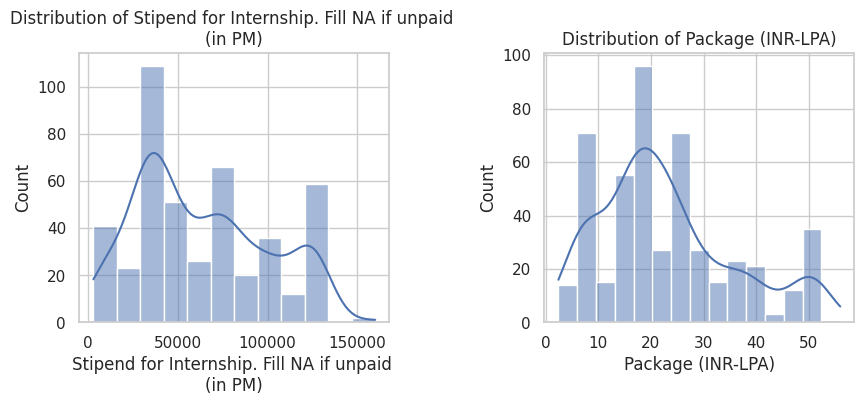

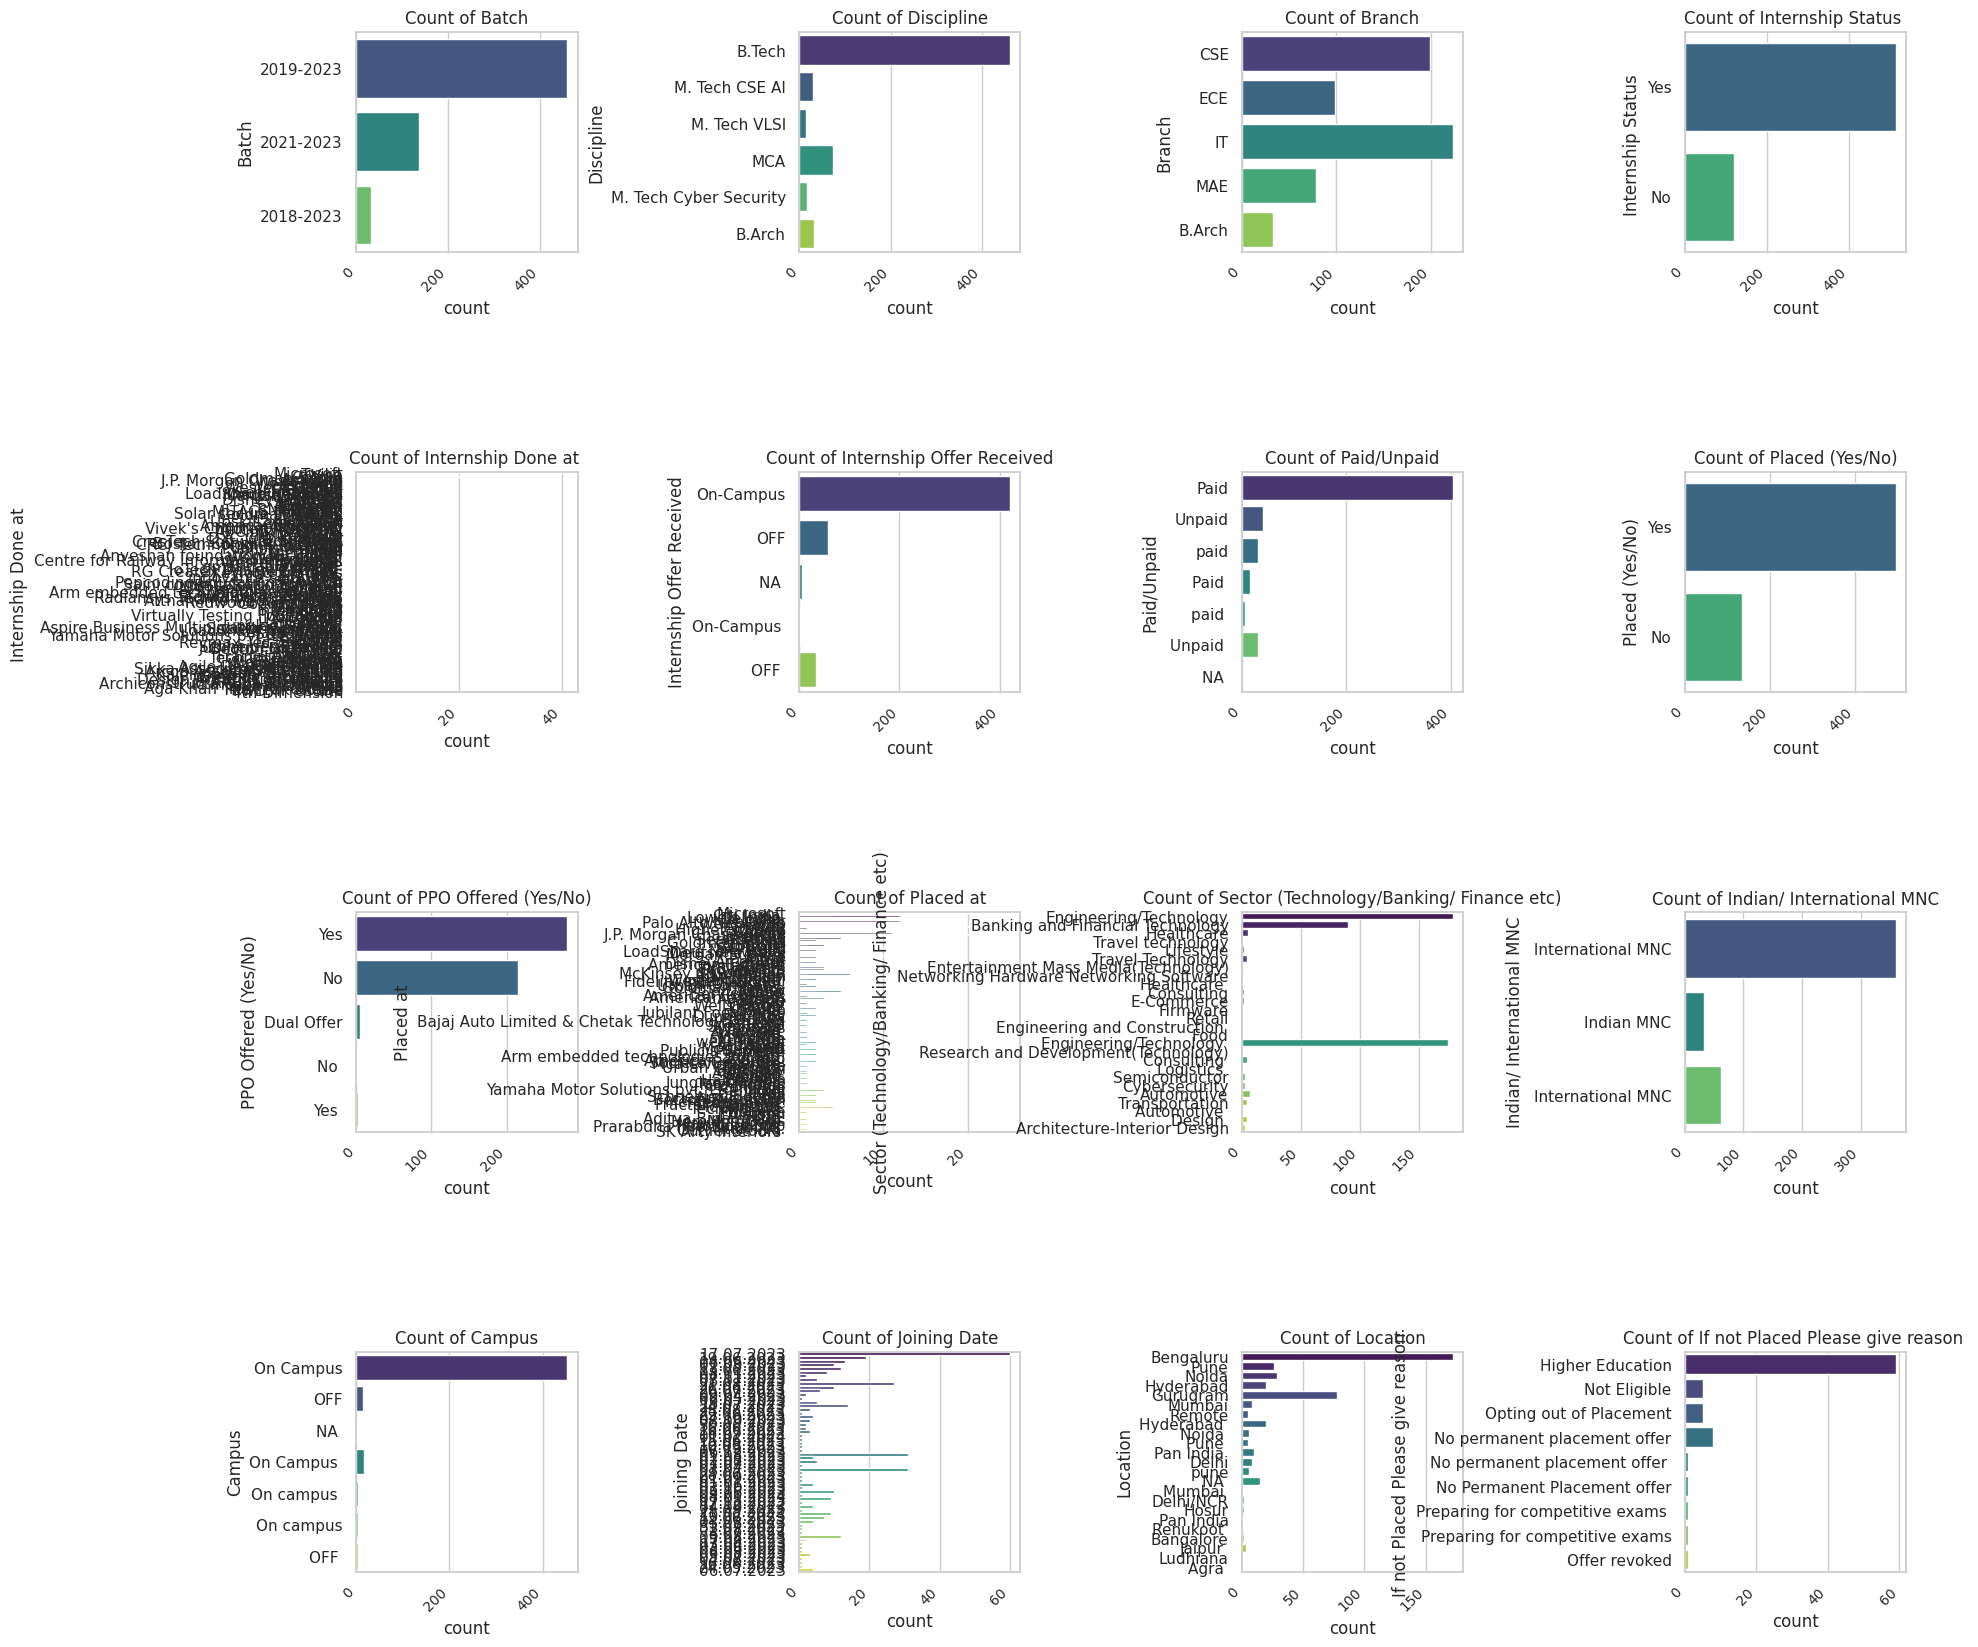

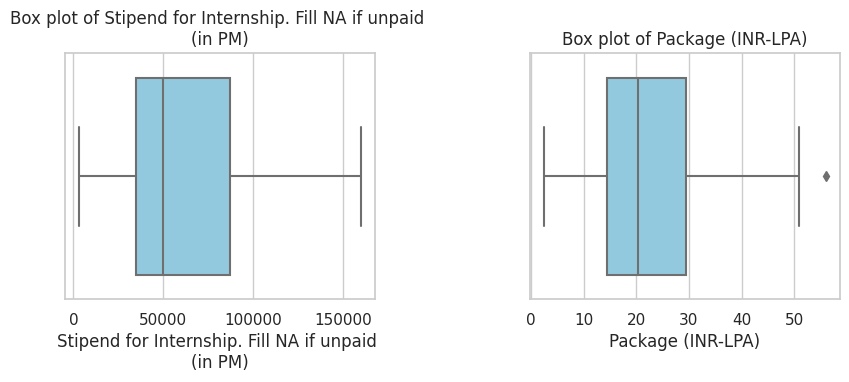

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset (replace 'your_dataset.csv' with the actual name of your dataset file)
df = pd.read_csv('/content/TnP_Dataset.csv', encoding='latin-1')

# Remove irrelevant columns
irrelevant_cols = ['Sr No', 'Mobile No', 'Email ID', 'Name', 'Enrollment No']
df = df.drop(irrelevant_cols, axis=1)

# Remove unnecessary unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Display information about the dataset
print(df.info())

# Set up a better layout for subplots with added space
plt.figure(figsize=(16, 14))
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Added space between subplots

# Visualize the distribution of numeric variables
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.show()

# Visualize categorical variables using count plots
categorical_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(20, 20))
plt.subplots_adjust(hspace=1, wspace=1)  # Added space between subplots
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i)
    sns.countplot(y=df[col], palette='viridis')
    plt.title(f'Count of {col}', fontsize=12)
    plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels

plt.show()

# Identify outliers using box plots
plt.figure(figsize=(16, 8))
plt.subplots_adjust(hspace=0.5, wspace=0.5)  # Added space between subplots
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box plot of {col}')

plt.show()




**FEATURE ENGINEERING**


<ipython-input-53-8423724d308c>:17: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Joining_Month'] = pd.to_datetime(df['Joining Date'], errors='coerce').dt.month


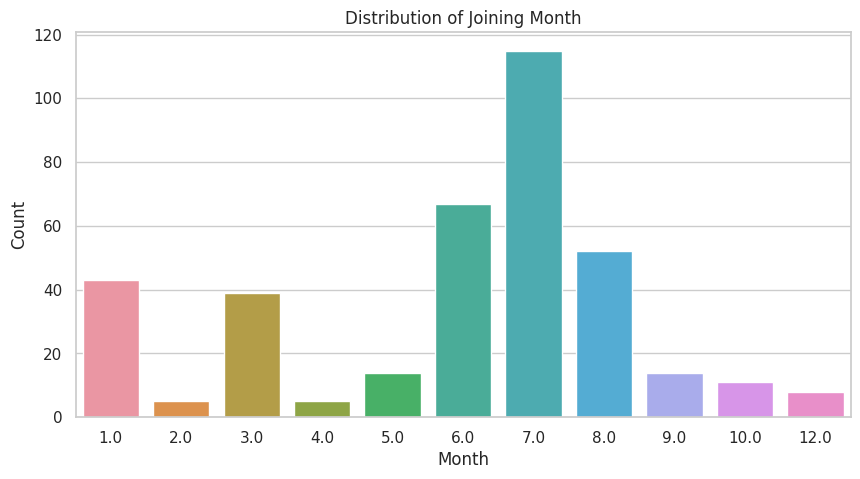

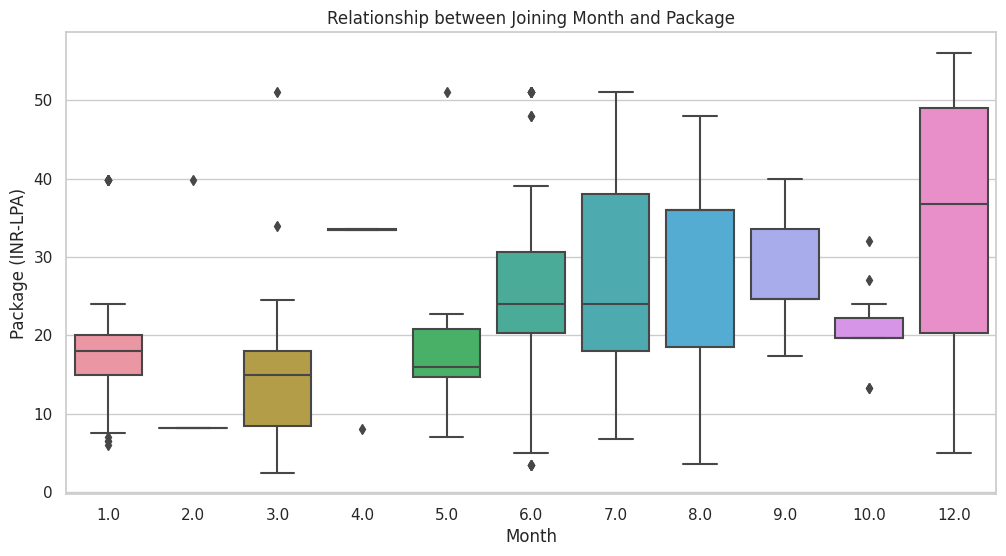

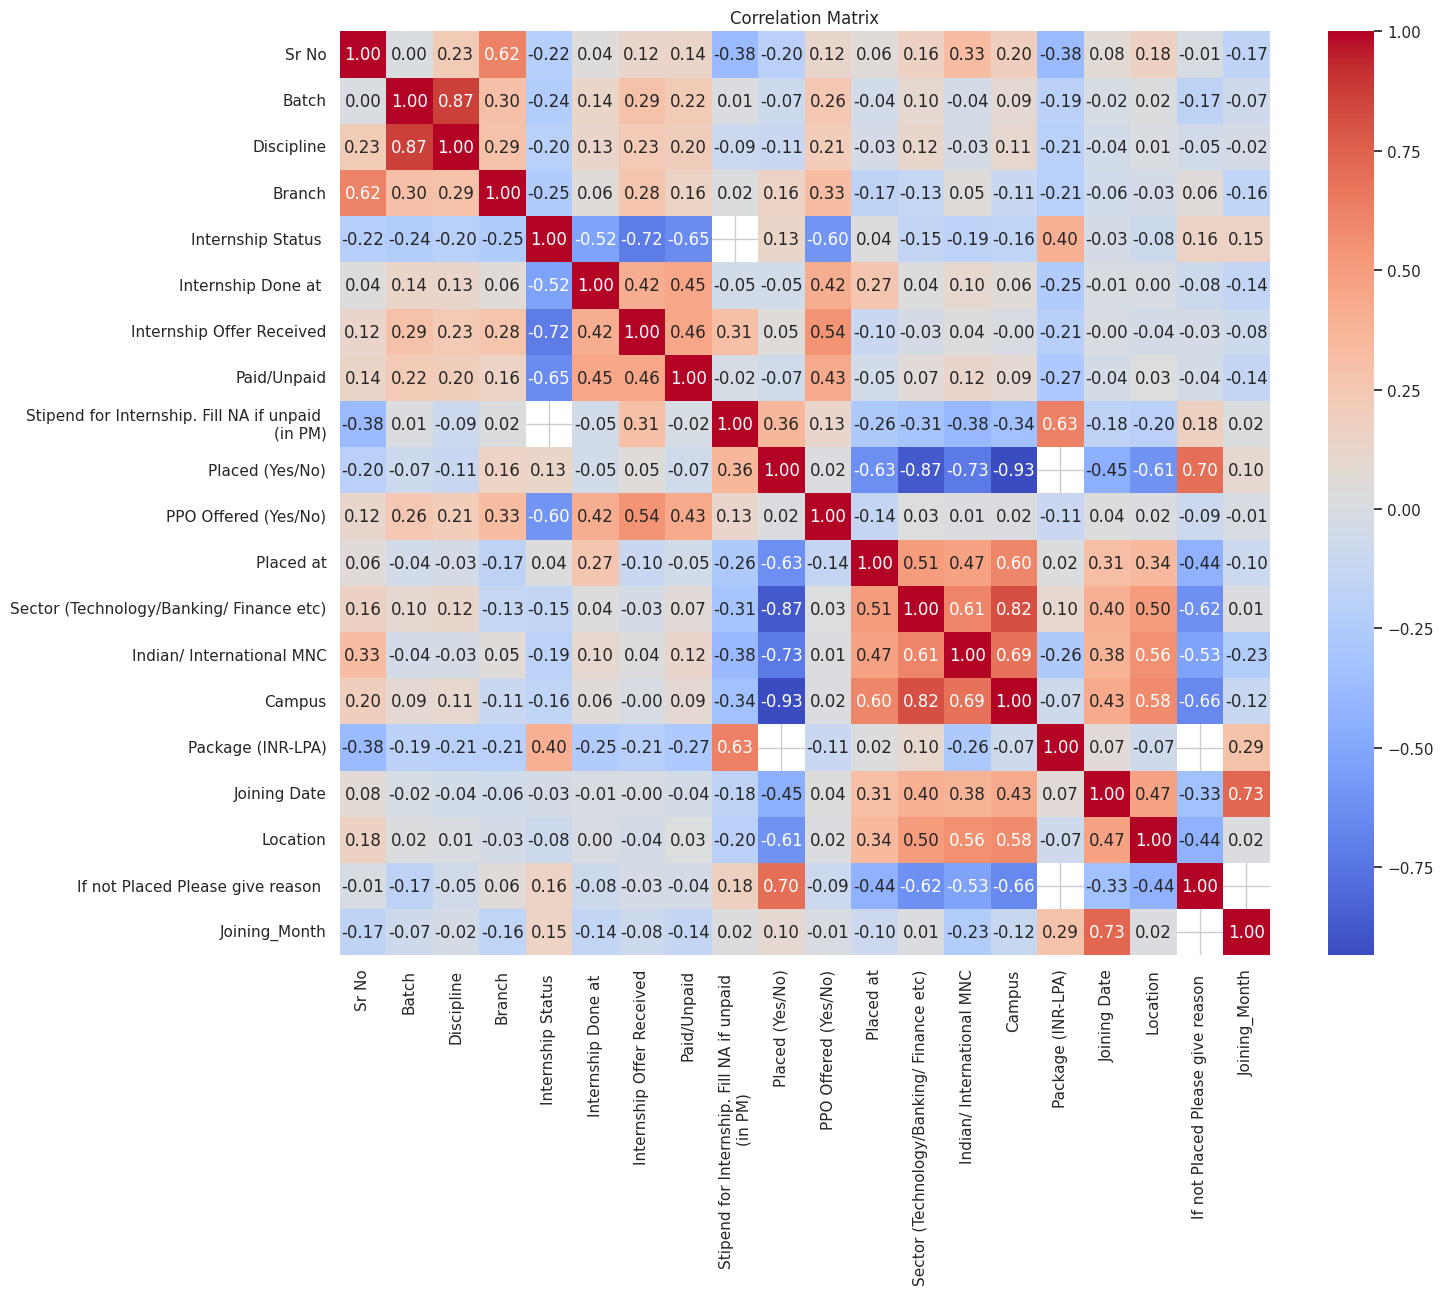

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import datetime

# Load your dataset (replace 'your_dataset.csv' with the actual name of your dataset file)
df = pd.read_csv('/content/TnP_Dataset.csv', encoding='latin-1')

# Remove irrelevant columns
irrelevant_cols = ['Mobile No', 'Email ID', 'Name', 'Enrollment No']
df = df.drop(irrelevant_cols, axis=1)

# Remove unnecessary unnamed columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Feature Engineering
# Example: Create a new feature 'Joining_Month' based on 'Joining Date'
df['Joining_Month'] = pd.to_datetime(df['Joining Date'], errors='coerce').dt.month

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Distribution of Joining_Month
plt.figure(figsize=(10, 5))
sns.countplot(x='Joining_Month', data=df)
plt.title('Distribution of Joining Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

# Relationship between Joining Month and Package
plt.figure(figsize=(12, 6))
sns.boxplot(x='Joining_Month', y='Package (INR-LPA)', data=df)
plt.title('Relationship between Joining Month and Package')
plt.xlabel('Month')
plt.ylabel('Package (INR-LPA)')
plt.show()

# Correlation Matrix
plt.figure(figsize=(15, 12))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()



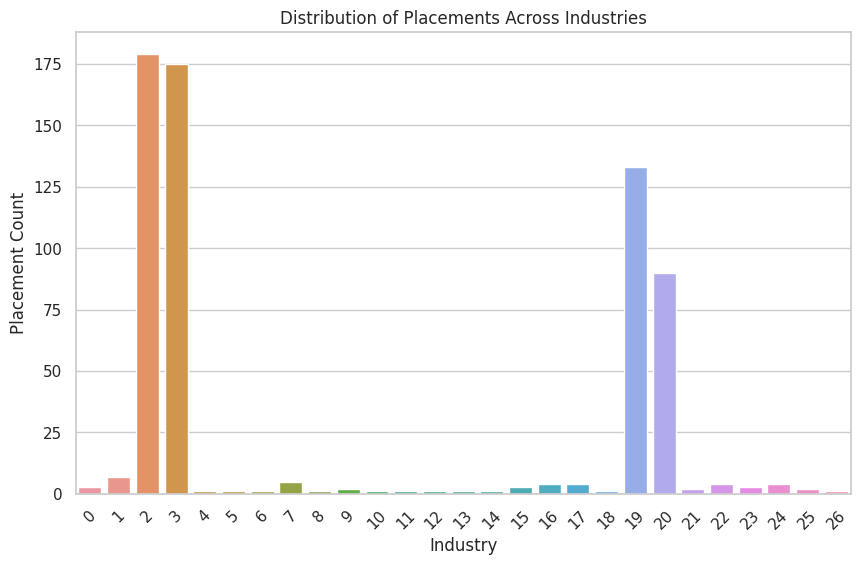

In [ ]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Create a new feature 'Industry' by encoding 'Sector' column
df['Industry'] = label_encoder.fit_transform(df['Sector (Technology/Banking/ Finance etc)'].astype(str))

# Display the updated DataFrame
df[['Sector (Technology/Banking/ Finance etc)', 'Industry']].head()
# Plotting the distribution of placements across industries
plt.figure(figsize=(10, 6))
sns.countplot(x='Industry', data=df)
plt.xlabel('Industry')
plt.ylabel('Placement Count')
plt.title('Distribution of Placements Across Industries')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()





**PATTERN RECOGNITION USING LOGISTIC REGRESSION**

Accuracy: 0.88
Confusion Matrix:
[[  9  14]
 [  1 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.39      0.55        23
           1       0.88      0.99      0.93       104

    accuracy                           0.88       127
   macro avg       0.89      0.69      0.74       127
weighted avg       0.88      0.88      0.86       127



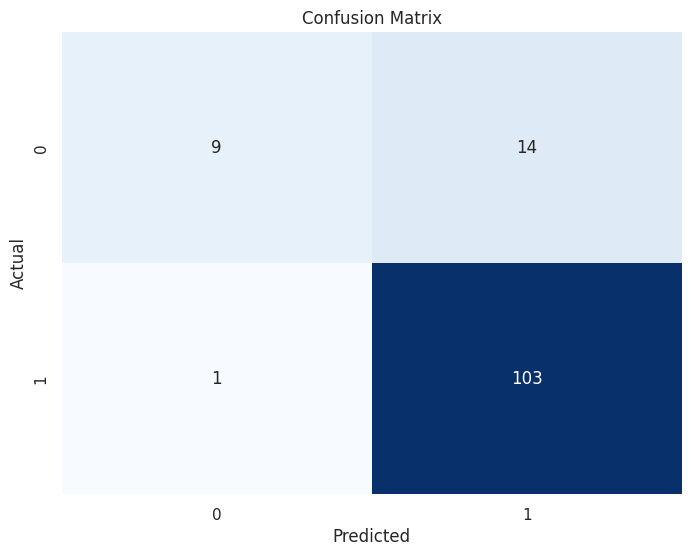

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset with 'latin-1' encoding
df = pd.read_csv('/content/TnP_Dataset.csv', encoding='latin-1')

# Drop irrelevant columns
columns_to_drop = ['Sr No', 'Batch', 'Discipline', 'Branch', 'Internship Status ',
                   'Internship Done at ', 'Internship Offer Received', 'Paid/Unpaid',
                   'Stipend for Internship. Fill NA if unpaid \n(in PM)',
                   'Placed at', 'Joining Date', 'If not Placed Please give reason ']
df_ml = df.drop(columns=columns_to_drop)

# Drop rows with missing target variable
df_ml = df_ml.dropna(subset=['Placed (Yes/No)'])

# Encode categorical variables
df_ml_encoded = pd.get_dummies(df_ml, drop_first=True)

# Split the data into features (X) and target variable (y)
X = df_ml_encoded.drop(columns=['Placed (Yes/No)_Yes'])
y = df_ml_encoded['Placed (Yes/No)_Yes']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()




**PATTERN RECOGNITION USING SVM**

In [ ]:
from sklearn.svm import SVC

# Create and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_report_svm = classification_report(y_test, y_pred_svm)

# Display the results
print(f'SVM Accuracy: {accuracy_svm:.2f}')
print('SVM Confusion Matrix:')
print(conf_matrix_svm)
print('SVM Classification Report:')
print(class_report_svm)


SVM Accuracy: 0.91
SVM Confusion Matrix:
[[23  0]
 [11 93]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        23
           1       1.00      0.89      0.94       104

    accuracy                           0.91       127
   macro avg       0.84      0.95      0.88       127
weighted avg       0.94      0.91      0.92       127

